# Importing the Library

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Dataset

In [25]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
data.shape

(50, 5)

In [27]:
data.info()
# No Null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [29]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# Data_Preprocessing

In [30]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:xlabel='R&D Spend'>

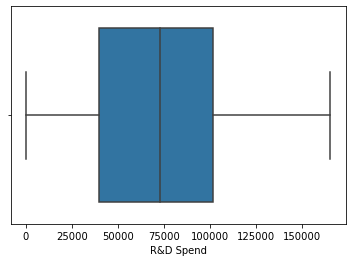

In [31]:
sns.boxplot(x = 'R&D Spend',data=data)

<AxesSubplot:xlabel='Administration'>

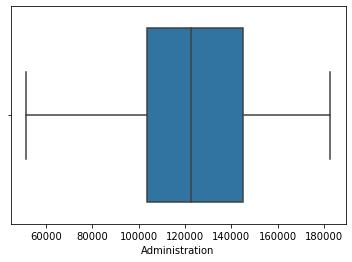

In [32]:
sns.boxplot(x = 'Administration',data=data)

<AxesSubplot:xlabel='Marketing Spend'>

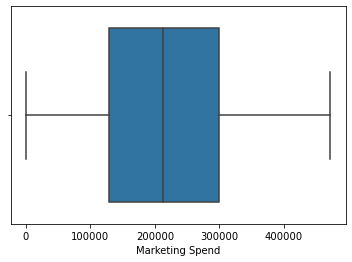

In [33]:
sns.boxplot(x = 'Marketing Spend',data=data)

<AxesSubplot:xlabel='Profit'>

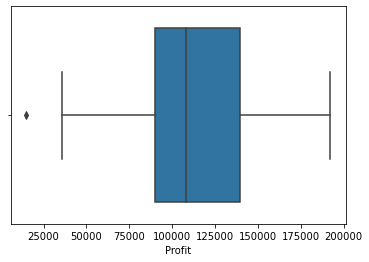

In [34]:
sns.boxplot(x = 'Profit',data=data)

In [35]:
q1= data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
Pos_outlier = q3+1.5*iqr
Neg_outlier = q1-1.5*iqr

In [36]:

data = data[~((data< (q1-1.5*iqr))| (data > (q3+1.5*iqr))).any(axis=1)]

data.head()

C:\Users\dasar\AppData\Local\Temp/ipykernel_12056/3495355619.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data< (q1-1.5*iqr))| (data > (q3+1.5*iqr))).any(axis=1)]


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
data.shape

(49, 5)

<AxesSubplot:xlabel='Profit'>

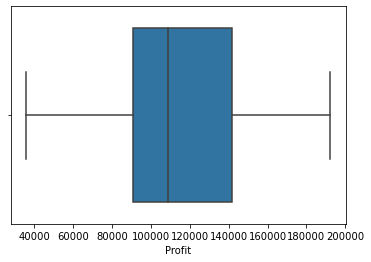

In [39]:
sns.boxplot(x = 'Profit',data=data)

In [37]:
# from the above boxplots, it is clear that there are no outliers in the dataset

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     object 
 4   Profit           49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [42]:
data['State'] = data['State'].astype('category')
data['State'] = data['State'].cat.codes
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [43]:
data = pd.get_dummies(data,columns= ['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [44]:
data = data.drop(['State_0'],axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# EDA

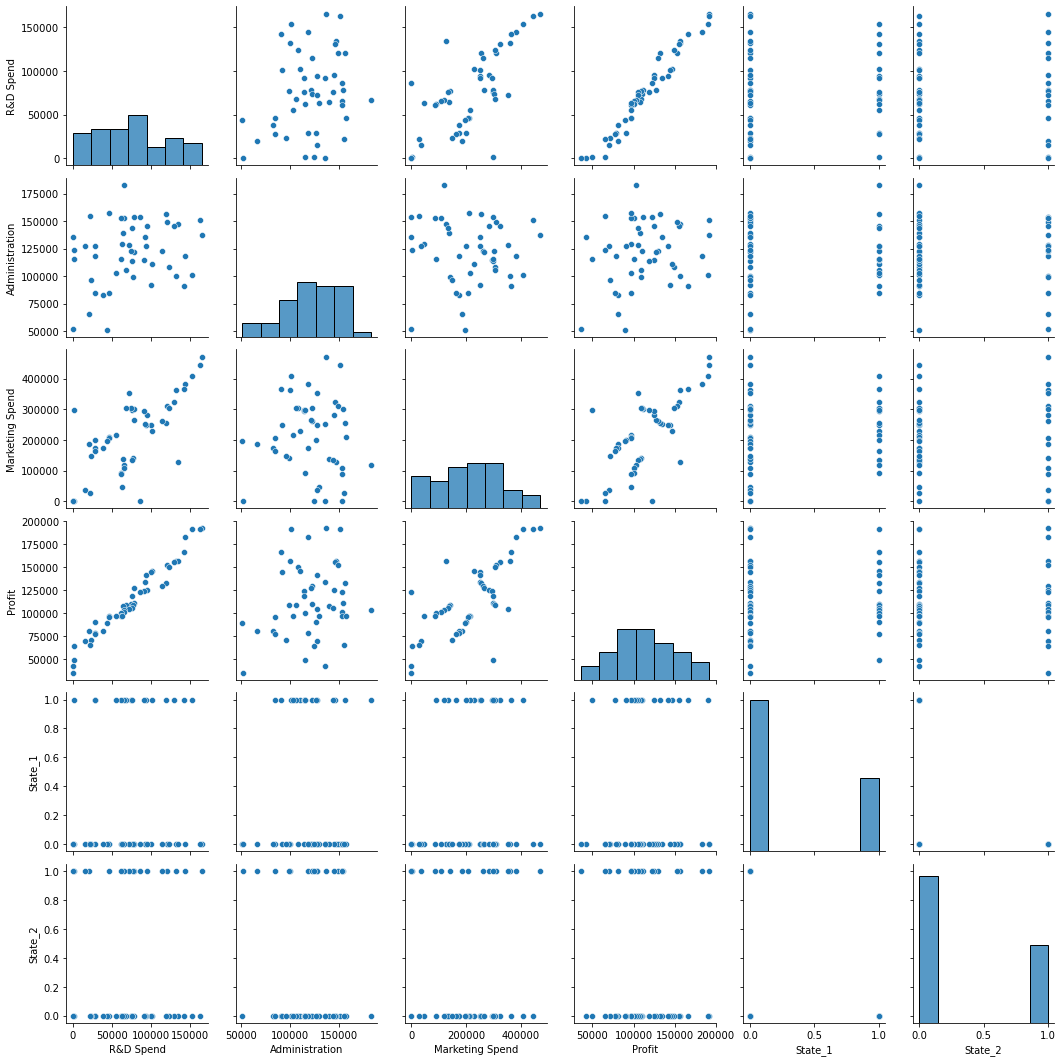

In [45]:
sns.pairplot(data)

C:\Users\dasar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

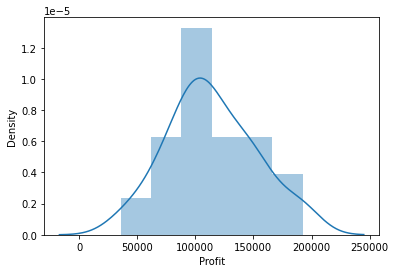

In [46]:
sns.distplot(data['Profit'])

In [47]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
R&D Spend,1.000000,0.243438,0.711654,0.978437,0.085734,0.015816
Administration,0.243438,1.000000,-0.037280,0.205841,0.008334,0.002858
Marketing Spend,0.711654,-0.037280,1.000000,0.739307,0.191104,-0.055087
Profit,0.978437,0.205841,0.739307,1.000000,0.088008,-0.004679
State_1,0.085734,0.008334,0.191104,0.088008,1.000000,-0.507519
State_2,0.015816,0.002858,-0.055087,-0.004679,-0.507519,1.000000


<AxesSubplot:>

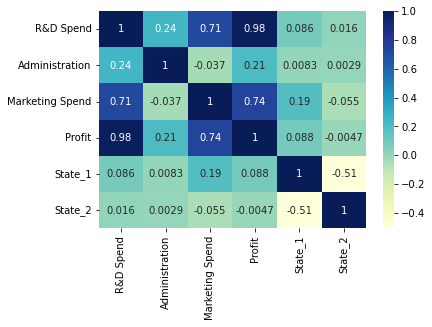

In [49]:
sns.heatmap(data.corr(),annot = True,fmt = '.2g',cmap="YlGnBu")

In [50]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'State_1',
       'State_2'],
      dtype='object')

In [52]:
x = data[['R&D Spend', 'Administration', 'Marketing Spend','State_1','State_2']]

In [53]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [54]:
y = data[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scale = ss.fit_transform(x)

In [63]:
pd.DataFrame(x_scale)

,0,1,2,3,4
0,2.018325,0.552080,2.146120,-0.696311,1.371989
1,1.956704,1.069017,1.913596,-0.696311,-0.728869
2,1.751650,-0.724297,1.613709,1.436141,-0.728869
3,1.548545,-0.098597,1.407457,-0.696311,1.371989
4,1.497818,-1.072513,1.265442,1.436141,-0.728869
5,1.268706,-0.771809,1.237866,-0.696311,1.371989
6,1.330036,0.919834,-0.722891,-0.696311,-0.728869
7,1.233349,0.860257,0.912791,1.436141,-0.728869
8,1.014870,0.974102,0.810533,-0.696311,1.371989
9,1.077405,-0.455342,0.755234,-0.696311,-0.728869


In [64]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 101)

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39, 5)
(39, 1)
(10, 5)
(10, 1)


In [69]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2
44,22177.74,154806.14,28334.72,0,0
7,130298.13,145530.06,323876.68,1,0
41,27892.92,84710.77,164470.71,1,0
3,144372.41,118671.85,383199.62,0,1
39,38558.51,82982.09,174999.30,0,0


In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=lm.predict(x_test)
y_pred

array([[ 76194.39306408],
       [115396.45005436],
       [118301.73189405],
       [ 67471.86423095],
       [129287.68548121],
       [191122.46038197],
       [ 46095.73644503],
       [116618.76158165],
       [118576.10128379],
       [ 57551.99213134]])

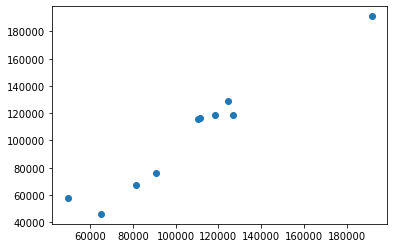

In [76]:
plt.scatter(y_test,y_pred)

In [77]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [78]:
reg_mod  = smf.OLS(endog=y_train,exog=x_train).fit()

In [79]:
reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              695.0
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                    3.38e-33
Time:                        12:20:00   Log-Likelihood:                         -421.61
No. Observations:                  39   AIC:                                      853.2
Df Residuals:                      34   BIC:                                      861.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.6961      0.079      8.776      0.000       0.535       0.857
Administration      0.3263      0.036      9.026      0.000       0.253       0.400
Marketing Spend     0.0914      0.026      3.501      0.001       0.038       0.145
State_1          1837.9610   5349.854      0.344      0.733   -9034.250    1.27e+04
State_2           531.8677   5046.896      0.105      0.917   -9724.658    1.08e+04
==============================================================================
Omnibus:                        0.975   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.012
Skew:                          -0.325   Prob(JB):                        0.603
Kurtosis:                       2.553   Cond. No.                     8.54e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
x1 = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y1 = data[['Profit']]

In [90]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x1_scaled = scale.fit_transform(x1)

In [92]:
x11 = pd.DataFrame(x1_scaled,columns = ['R&D Spend','Administration','Marketing Spend'])
x11.head()

,R&D Spend,Administration,Marketing Spend
0,2.018325,0.552080,2.146120
1,1.956704,1.069017,1.913596
2,1.751650,-0.724297,1.613709
3,1.548545,-0.098597,1.407457
4,1.497818,-1.072513,1.265442


In [88]:
x1.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [89]:
y1.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [93]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size = 0.7,random_state = 101)

In [94]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(34, 3)
(34, 1)
(15, 3)
(15, 1)


In [96]:
x1_train.head()

,R&D Spend,Administration,Marketing Spend
14,119943.24,156547.42,256512.92
25,64664.71,139553.16,137962.62
15,114523.61,122616.84,261776.23
24,77044.01,99281.34,140574.81
42,23640.93,96189.63,148001.11


In [98]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [101]:
y1_pred = lr.predict(x1_test)
y1_pred

array([[ 76264.75634567],
       [114818.3508182 ],
       [116466.29409541],
       [ 69290.53707943],
       [128497.49977012],
       [188361.05367652],
       [ 48696.88317143],
       [118103.40314774],
       [116816.21907152],
       [ 57693.31246048],
       [ 66021.88461467],
       [159508.809739  ],
       [ 74648.38875518],
       [172339.018087  ],
       [ 83320.72754936]])

In [103]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as slf

In [106]:
res_model = slf.OLS(endog= y1_train,exog= x1_train).fit()

In [107]:
res_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1029.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                    4.12e-31
Time:                        12:46:23   Log-Likelihood:                         -367.97
No. Observations:                  34   AIC:                                      741.9
Df Residuals:                      31   BIC:                                      746.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7291      0.083      8.836      0.000       0.561       0.897
Administration      0.3256      0.037      8.903      0.000       0.251       0.400
Marketing Spend     0.0815      0.027      3.074      0.004       0.027       0.136
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.588
Skew:                          -0.227   Prob(JB):                        0.745
Kurtosis:                       2.542   Cond. No.                         10.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
from sklearn import metrics

In [111]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))

MAE:  7979.203194869629


In [113]:
print('MAE: ',metrics.mean_absolute_error(y1_test,y1_pred))

# Here Error value is less because State variable dropped and data splitting percentage is 70%
# Better accuracy compared to previous model

MAE:  6834.826521160122
